Try out different clustering models in the given dataset. Find the optimum 
number of clusters in each model and create the model with optimum number of 
clusters. Also learn about dB scan clustering and implement it

In [1]:
#imports the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the dataset
data = pd.read_csv("C:/DSA COURSE/DataSets/Wine_clust.csv")
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.shape

(178, 13)

In [5]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [7]:
#check null values
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No Null values

In [8]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
scaled_data = Scaler.fit_transform(data)

In [9]:
type(scaled_data)

numpy.ndarray

In [10]:
#Convert array to dataframe
data1=pd.DataFrame(scaled_data)

# K-Means Clustering

In [11]:
#import
from sklearn.cluster import KMeans

C:\Users\Shaima Junaid\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


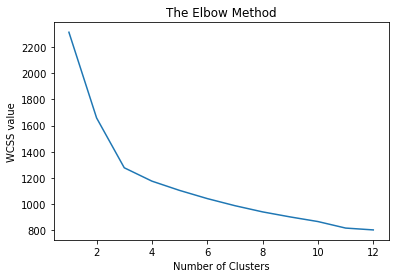

In [12]:
#plot the elbow method to find the cluster
wcss =[]
for i in range(1,13):
    kmeans = KMeans(n_clusters =i, init = 'k-means++' ,random_state =42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS value")
plt.show()

From the above plot, Maximum curvature of the curve is at 3

In [13]:
#cluster = 3
kmeans = KMeans(n_clusters = 3, init = 'k-means++' ,random_state =42)
y_kmeans = kmeans.fit_predict(data1)

In [14]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [15]:
# find the score using silhouette Score
from sklearn.metrics import silhouette_score
sil_ahc = silhouette_score(data1,y_kmeans)
sil_ahc

0.2848589191898987

 weak silhouette_score

# Hierarchial Clustering

In [16]:
#import
import scipy.cluster.hierarchy as sch

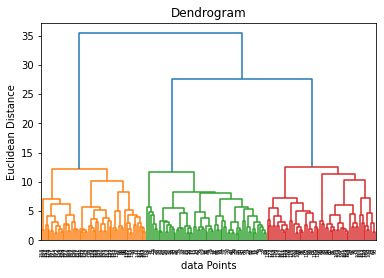

In [17]:
#plot the dendrogram
dendrogram =sch.dendrogram(sch.linkage(data1,method = "ward"))
plt.title("Dendrogram")
plt.xlabel("data Points")
plt.ylabel("Euclidean Distance")
plt.show()

From the above plot, Maximum curvature of the curve is at 3

# Agglomerative Clustering

In [18]:
#import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [19]:
#Fit the clustering with ward linkage and affinity as euclidean.
ahc = AgglomerativeClustering(n_clusters = 3,affinity ='euclidean',linkage ="ward")
y_ahc = ahc.fit_predict(data1)

In [20]:
y_ahc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [21]:
# find the score using silhouette Score
from sklearn.metrics import silhouette_score
sil_ahc = silhouette_score(data1,y_ahc)

In [22]:
sil_ahc

0.2774439826952265

 weak silhouette_score

# DBSCAN

In [23]:
# importing the library
from sklearn.neighbors import NearestNeighbors
# creating an object of the NearestNeighbors class
neighb = NearestNeighbors(n_neighbors=10) 
# fitting the data to the object
nbrs=neighb.fit(data1) 
distances,indices=nbrs.kneighbors(data1) 

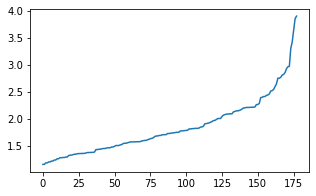

In [24]:
# sorting the distances
distances = np.sort(distances, axis = 0) 
# taking the second column of the sorted distances
distances = distances[:, 1] 
 # setting the figure size
plt.rcParams['figure.figsize'] = (5,3)
# plotting the distances
plt.plot(distances) 
plt.show()

From the above plot, Maximum curvature of the curve is at 3, so eps = 3

In [25]:
from sklearn.cluster import DBSCAN
# fitting the model
dbscan = DBSCAN(eps = 2.8, min_samples = 10).fit(data1) 
# getting the labels
clusters = dbscan.labels_ 

In [26]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [27]:
#Length of the cluster
print("Length of the cluster is ",len(set(clusters)))

Length of the cluster is  2


In [28]:
# find the score using silhouette Score
sil_ahc = silhouette_score(data1,clusters)
sil_ahc

0.1617653135552636

very  weak silhouette_score